Since there are many output layers and We don't really know what we're looking for, we need to:

    1. apply Hierarchical Clustering on output columns to create 1 dependent variable.
    2. apply LDA on testing and training sets, using the clusters as the dependent variable.
    3. plot the two principle components and view clustering.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('cleaned.data.txt')
# Replace missing data with NaN
dataset = dataset.replace(['?'],[np.nan])

In [3]:
#Impute median of column for missing data.
for i in dataset.loc[:, dataset.columns != 'date'].columns:
    dataset[i].fillna(dataset[i].median(), inplace=True)
dataset

,date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,3/1/1990,44101,1.5,7.8,182.5,407,166,66.3,4.5,2110,...,2000,39.6,58.8,95.5,85.4,70,90.2,79.4,87.3,99.6
1,3/2/1990,39024,3,7.7,182.5,443,214,69.2,6.5,2660,...,2590,39.6,60.7,94.8,85.4,80.8,90.2,79.5,92.1,100
2,3/4/1990,32229,5,7.6,182.5,528,186,69.9,3.4,1666,...,1888,39.6,58.2,95.6,85.4,52.9,90.2,75.8,88.7,98.5
3,3/5/1990,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,3/6/1990,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,39.6,62.7,95.6,85.4,71,92.1,78.2,87.5,99.5
5,3/7/1990,38572,3,7.8,202,372,186,68.8,4.5,1644,...,1764,39.6,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100
6,3/8/1990,41115,6,7.8,182.5,552,262,64.1,5,1603,...,1703,39.6,61.9,93.8,89.1,79.8,90.2,86.2,90.1,99
7,3/9/1990,36107,5,7.7,215,489,334,40.7,6,1613,...,1606,39.6,70.4,95.6,90.6,53.7,92.1,66.9,94.6,100
8,3/11/1990,29156,2.5,7.7,206,451,194,69.1,4.5,1249,...,1338,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,3/12/1990,39246,2,7.8,172,506,200,69,5,1865,...,1616,21.2,59.7,90.8,88.4,66.1,89,69,86.5,99.6


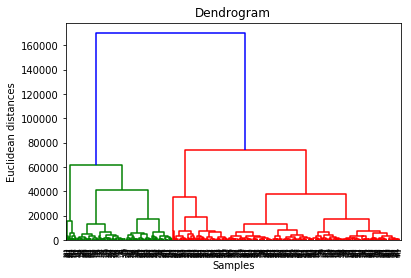

In [6]:
# Select Property Matrices
X = dataset.iloc[:, 1:39].values
#Using the Dendrogram to find the optimal number of clusters for output.
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

the longest running vertical line is in the middle and has 2 clusters running through it.

In [13]:
#Fitting  Hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, 
                             affinity = 'euclidean',
                            linkage = 'ward')
#ward seeks to minimize the variance in each of the clusters
y_hc = hc.fit_predict(X)
dataset['cluster'] = y_hc
dataset

,date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G,cluster
0,3/1/1990,44101,1.5,7.8,182.5,407,166,66.3,4.5,2110,...,39.6,58.8,95.5,85.4,70,90.2,79.4,87.3,99.6,0
1,3/2/1990,39024,3,7.7,182.5,443,214,69.2,6.5,2660,...,39.6,60.7,94.8,85.4,80.8,90.2,79.5,92.1,100,0
2,3/4/1990,32229,5,7.6,182.5,528,186,69.9,3.4,1666,...,39.6,58.2,95.6,85.4,52.9,90.2,75.8,88.7,98.5,1
3,3/5/1990,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100,1
4,3/6/1990,36924,1.5,8.0,242,496,176,64.8,4,2110,...,39.6,62.7,95.6,85.4,71,92.1,78.2,87.5,99.5,1
5,3/7/1990,38572,3,7.8,202,372,186,68.8,4.5,1644,...,39.6,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100,1
6,3/8/1990,41115,6,7.8,182.5,552,262,64.1,5,1603,...,39.6,61.9,93.8,89.1,79.8,90.2,86.2,90.1,99,0
7,3/9/1990,36107,5,7.7,215,489,334,40.7,6,1613,...,39.6,70.4,95.6,90.6,53.7,92.1,66.9,94.6,100,1
8,3/11/1990,29156,2.5,7.7,206,451,194,69.1,4.5,1249,...,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4,2
9,3/12/1990,39246,2,7.8,172,506,200,69,5,1865,...,21.2,59.7,90.8,88.4,66.1,89,69,86.5,99.6,0


In [14]:
y = dataset.iloc[:,39].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\Users\stealthyshampoo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Choosing the Right Classifier**

In [15]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Choosing the Right Classifier**

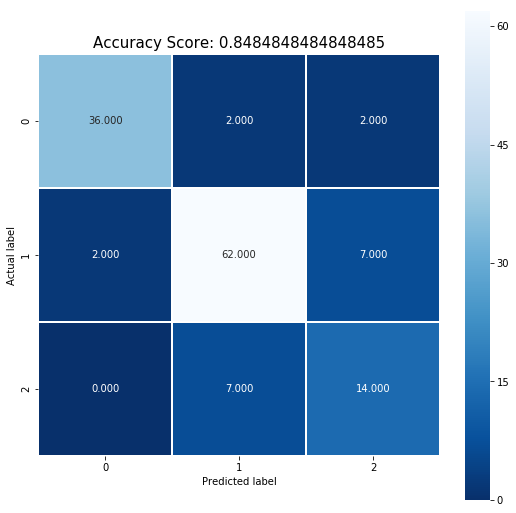

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
### Visualizing the confusion matrix.
import seaborn as sns
score = classifier.score(X_test, y_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

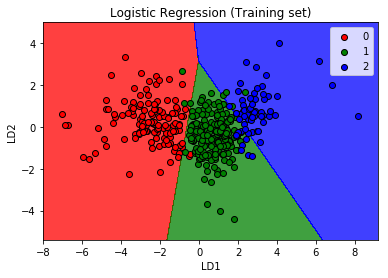

In [21]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j, edgecolors = 'black')
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

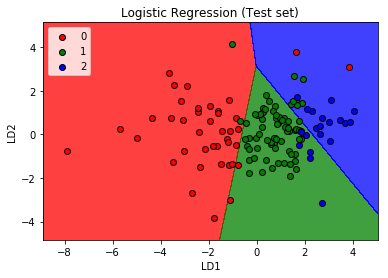

In [22]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j, edgecolors = 'black')
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()